# **Projet Green AI** : The use of AI in predicting fuel consumption of cars
04/12/2025. By Andrea Zanin, Antoine Ursel, Clement Vurpillot, Arsene Maitre and Gabriel Thibout 

**Why it matters** : Predicting fuel consumption accurately can help drivers, fleet operators, insurers etc. to reduce their consumption, plan trips more efficiently, and understand how driving behavior impacts fuel efficiency.

**Problématique** : Can we predict the fuel consumption of a combustion-engine vehicle using weather and engine sensor data ?

**Papers** : 
1) Impact of Ambient Temperature on Light-duty Gasoline Vehicle Fuel Consumption under Real-World Driving Conditions (by Pengfei Fan, Guohua Song, Hongyu Lu, Hang Yin, Zhiqiang Zhai, Yizheng Wu & Lei Yu) 
https://www.tandfonline.com/doi/figure/10.1080/15568318.2024.2385635

2) Analysis and Prediction Model of Fuel Consumption and Carbon Dioxide Emissions of Light-Duty Vehicles (by Ngo Le Huy HienORCID and Ah-Lian Kor)
 https://www.mdpi.com/2076-3417/12/2/803

**The dataset** : Vehicle_operating_data_with_ambient_temperature.csv, available at https://zenodo.org/records/12139111
We found it linked to the first paper listed above.

It is a "detailed, extensive dataset comprising 25,640,666 records of real-world vehicle operating (speed, acceleration, etc.) and fuel consumption data alongside 124,938 hourly meteorological profiles (temperature, relative humidity, etc.)"


# 1. Data exploration
In this first step, we explore the dataset and clean it if needed. We will also create a few visualisations to understand the dataset and maybe have ideas for feature engineering later in the project. 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Loading of the dataset
df = pd.read_csv('Vehicle_operating_data_with_ambient_temperature.csv')

# We print the basic information about the dataset
print(f"Dimensions of the dataset: {df.shape[0]:,} lines and {df.shape[1]} columns")

print(f"\nNames of the columns:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print("Data types:")
print(df.dtypes)



Dimensions of the dataset: 1,282,033 lines and 9 columns

Names of the columns:
   1. TIME
   2. PRS (kPa)
   3. TEM (℃)
   4. RHU (%)
   5. HI (℃)
   6. SPEED (km/h)
   7. ACC (m/s2)
   8. FCR (ml/s)
   9. VSP (kW/ton)
Data types:
TIME             object
PRS (kPa)       float64
TEM (℃)         float64
RHU (%)           int64
HI (℃)          float64
SPEED (km/h)    float64
ACC (m/s2)      float64
FCR (ml/s)      float64
VSP (kW/ton)    float64
dtype: object


In [82]:
# Print the first 10 lines 
print("First 10 lines of the dataset:")
df.head(10)


First 10 lines of the dataset:


,TIME,PRS (kPa),TEM (℃),RHU (%),HI (℃),SPEED (km/h),ACC (m/s2),FCR (ml/s),VSP (kW/ton)
0,2022-05-13 13:08:11,1007.5,21.9,13,21.900000,81.980624,-0.074368,3.4,4.436857
1,2022-02-05 13:15:42,1029.8,1.3,17,1.300000,5.713967,-0.055675,0.4,0.113897
2,2022-03-21 14:10:29,1019.7,11.9,15,11.900000,8.298537,0.077308,0.3,0.504408
3,2022-09-27 19:42:21,1008.5,22.6,54,22.600000,18.554211,-0.704937,0.4,-3.276558
4,2022-04-13 10:12:33,1016.2,15.1,33,15.100000,34.989316,0.052103,1.1,2.098442
5,2022-07-15 19:57:16,994.3,32.9,40,33.626014,41.003284,1.283915,2.5,18.004022
6,2022-08-31 10:41:51,1008.6,27.7,37,27.700000,47.057040,0.847447,2.1,14.536029
7,2021-10-03 15:17:33,1005.0,21.2,88,21.200000,59.818709,-0.321453,3.1,-2.400217
8,2021-09-11 17:12:18,1003.5,30.1,58,32.623885,0.000000,0.000000,0.3,0.000000
9,2022-08-29 16:36:29,1008.8,21.8,69,21.800000,46.916036,-0.015261,0.3,2.121448


In [83]:
# Info on the missing values
print("Number of missing values :", df.isnull().sum().sum())


Number of missing values : 0


In [84]:
# Update of the column names for better understanding
df = df.rename(columns={
    "TIME": "Timestamp",
    "PRS (kPa)": "Pressure (kPa)",
    "TEM (℃)": "Temperature (℃)",
    "RHU (%)": "Relative_Humidity (%)",
    "HI (℃)": "Heat_Index (℃)",
    "SPEED (km/h)": "Speed (km/h)",
    "ACC (m/s2)": "Acceleration (m/s²)",
    "FCR (ml/s)": "Fuel_Consumption (ml/s)",
    "VSP (kW/ton)": "Vehicle_Specific_Power (kW/ton)"
})

#verification 
df.head()


,Timestamp,Pressure (kPa),Temperature (℃),Relative_Humidity (%),Heat_Index (℃),Speed (km/h),Acceleration (m/s²),Fuel_Consumption (ml/s),Vehicle_Specific_Power (kW/ton)
0,2022-05-13 13:08:11,1007.5,21.9,13,21.9,81.980624,-0.074368,3.4,4.436857
1,2022-02-05 13:15:42,1029.8,1.3,17,1.3,5.713967,-0.055675,0.4,0.113897
2,2022-03-21 14:10:29,1019.7,11.9,15,11.9,8.298537,0.077308,0.3,0.504408
3,2022-09-27 19:42:21,1008.5,22.6,54,22.6,18.554211,-0.704937,0.4,-3.276558
4,2022-04-13 10:12:33,1016.2,15.1,33,15.1,34.989316,0.052103,1.1,2.098442


In [85]:
# Conversion of the timestamp to datetime instead of object for future use
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')



In [86]:
# Basic descriptive statistics
print(df.describe())


                           Timestamp  Pressure (kPa)  Temperature (℃)  \
count                        1282033    1.282033e+06     1.282033e+06   
mean   2022-04-06 10:23:04.092933376    1.013161e+03     1.512724e+01   
min              2021-08-31 08:00:30    9.872000e+02    -1.060000e+01   
25%              2021-12-22 16:35:00    1.004600e+03     5.600000e+00   
50%              2022-03-24 08:22:41    1.013600e+03     1.620000e+01   
75%              2022-08-02 14:32:18    1.021300e+03     2.480000e+01   
max              2022-12-20 21:48:30    1.043300e+03     3.890000e+01   
std                              NaN    1.024829e+01     1.120698e+01   

       Relative_Humidity (%)  Heat_Index (℃)  Speed (km/h)  \
count           1.282033e+06    1.282033e+06  1.282033e+06   
mean            5.022907e+01    1.551881e+01  2.827185e+01   
min             7.000000e+00   -1.060000e+01 -4.185045e-01   
25%             2.700000e+01    5.600000e+00  8.714572e-01   
50%             5.000000e+01    

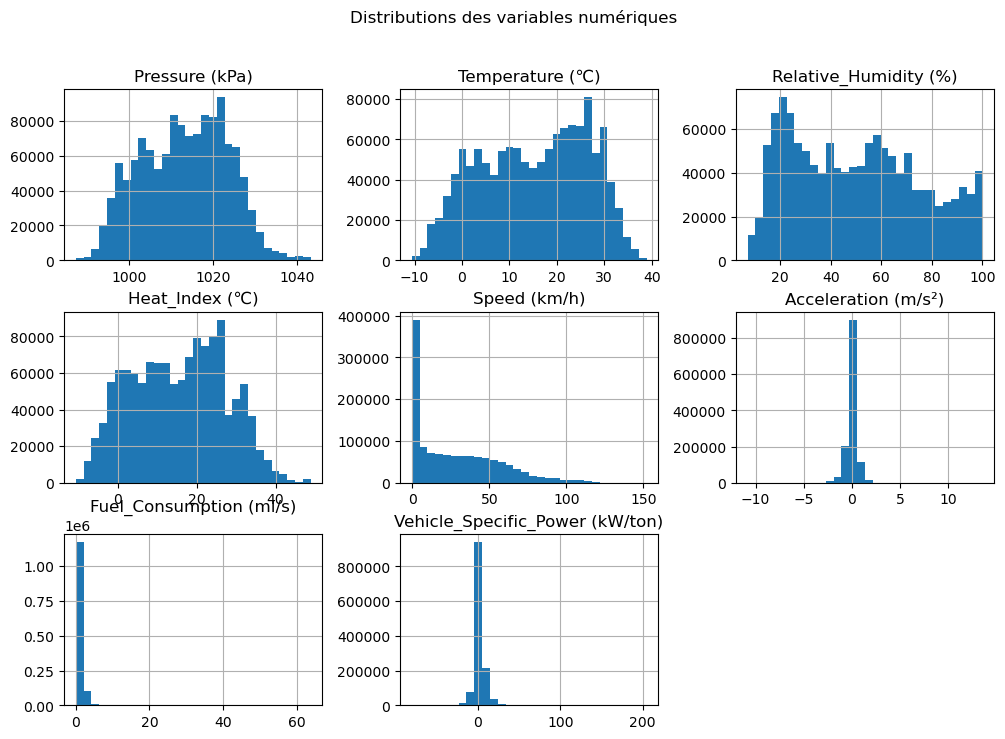

In [87]:
# Distribution of the numerical variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distributions des variables numériques")
plt.show()


We can see here that the dataset is very rich. The first 4 graphics are the weather data (pressure, temp, humidity and heat) and we can clearly see that a lot of different scenarios have been recorded and are in the dataset. A lot of different pressures, temperatures, etc. are in the dataset. 

This is useful because it ensures that our model will work in different use cases and not in one specific weather pattern. (if the dataset was only trained on high heat and high pressure then our model would be worthless in siberia or greenland for example).

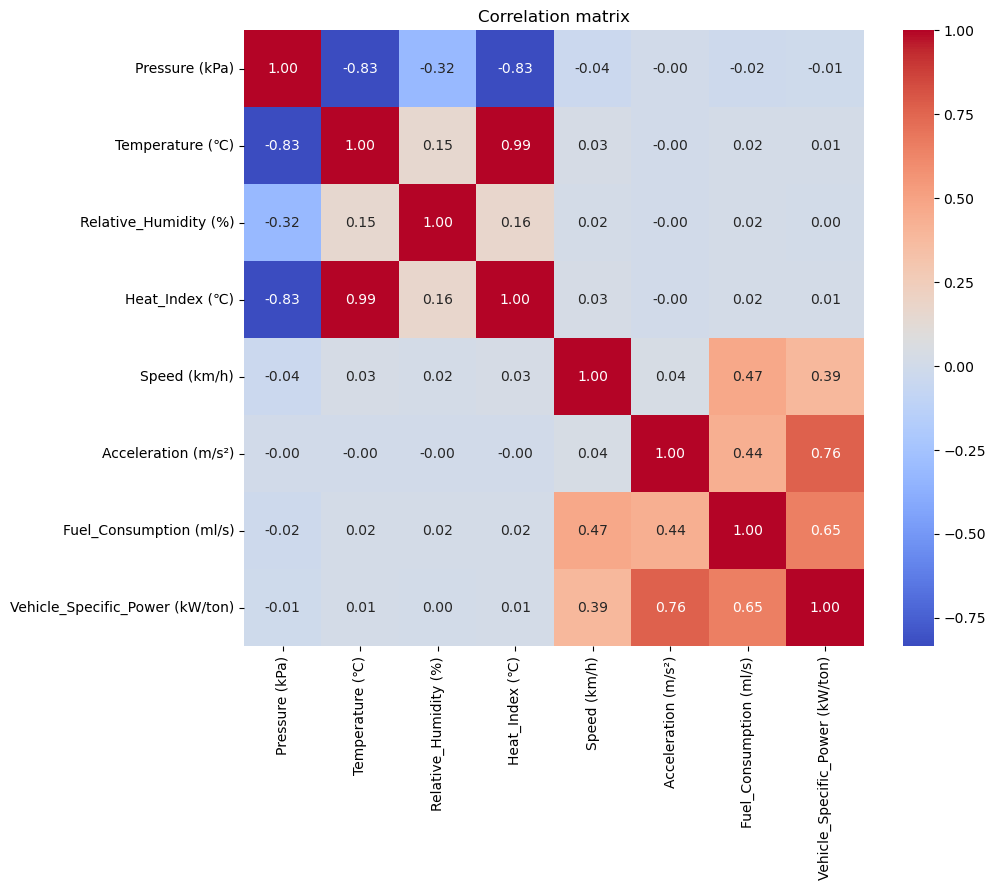

In [88]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()


Apart from the obvious correlation between Heat_Index and Temperature (0.99), we can see something that might be obvious to meteorologists but wasn't to us. It's the strong negative correlation (-0.83) between Pressure and Temperature/Heat_Index. Not relevant to our project but was interesting to notice.

We can also see that there is moderate/strong correlation between fuel_consumption and VSP (vehicle specific power), between fuel_consumption and acceleration, and between fuel_consumption and speed. (which makes sense because accelerating/higher speed/higher VSP = more consumption).

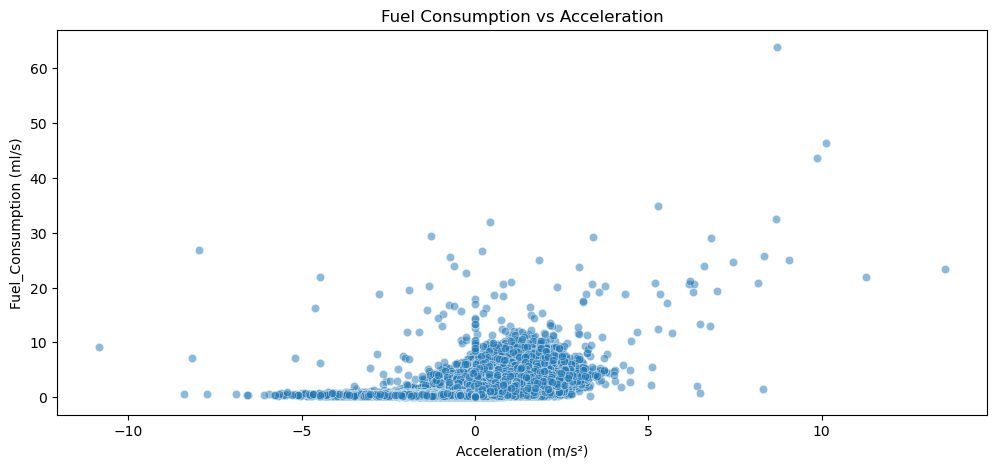

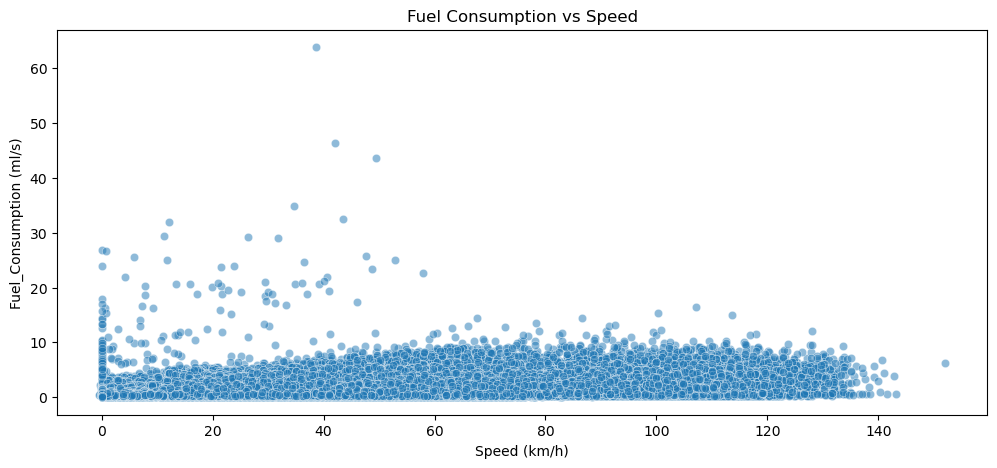

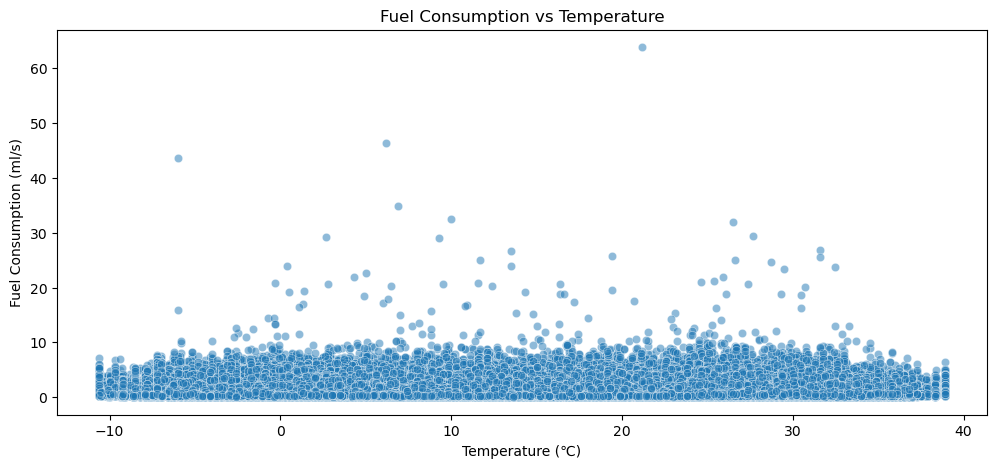

In [89]:
# Visualisation of the relationship between fuel consumption and acceleration, and between fuel consumption and speed

plt.figure(figsize=(12, 5))
sns.scatterplot(x='Acceleration (m/s²)', y='Fuel_Consumption (ml/s)', data=df, alpha=0.5)
plt.title("Fuel Consumption vs Acceleration")
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(x='Speed (km/h)', y='Fuel_Consumption (ml/s)', data=df, alpha=0.5)
plt.title("Fuel Consumption vs Speed")
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(x='Temperature (℃)', y='Fuel_Consumption (ml/s)', data=df, alpha=0.5)
plt.xlabel("Temperature (℃)")
plt.ylabel("Fuel Consumption (ml/s)")
plt.title("Fuel Consumption vs Temperature")
plt.show()




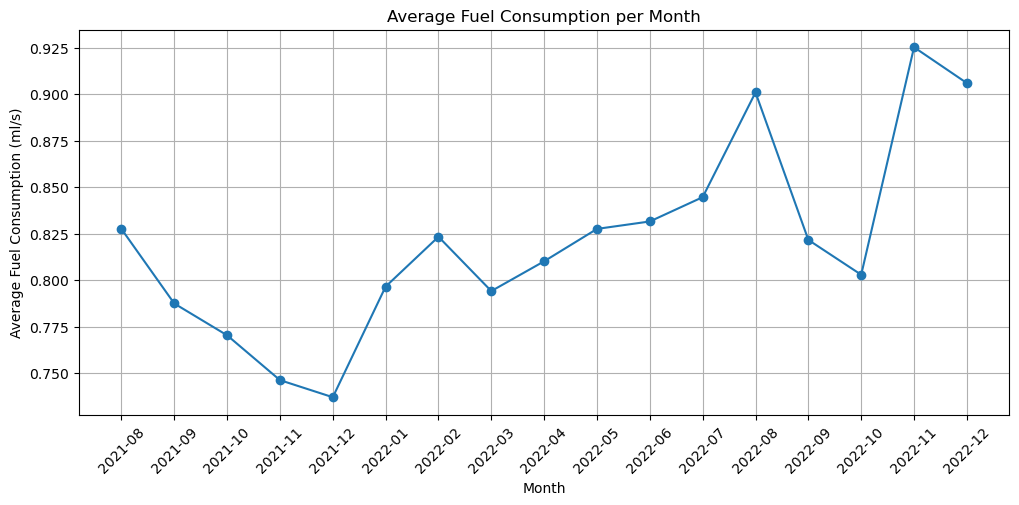

In [90]:
# Extract month and year from the timestamp column
df['YearMonth'] = df['Timestamp'].dt.to_period('M')

# Average fuel consumption per month
monthly_avg = df.groupby('YearMonth')['Fuel_Consumption (ml/s)'].mean().reset_index()

# Visualisation
plt.figure(figsize=(12, 5))
plt.plot(monthly_avg['YearMonth'].astype(str), monthly_avg['Fuel_Consumption (ml/s)'], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Average Fuel Consumption (ml/s)")
plt.title("Average Fuel Consumption per Month")
plt.grid(True)
plt.show()


We can kind of see a pattern here. The colder months of late 2021 and early 2022 (from oct 21 to april 22) are the less consuming months compared to the warmer months (from may 22 to sept 22). 

The months of november 22 and december 22 are quite strange, they have the highest consumption which doesn't make sense compared to nov 21 and dec 21. Which is why I said at the beginning of this markdown "kind of see a pattern", there is no definite insight here. 

We might understand this better later.

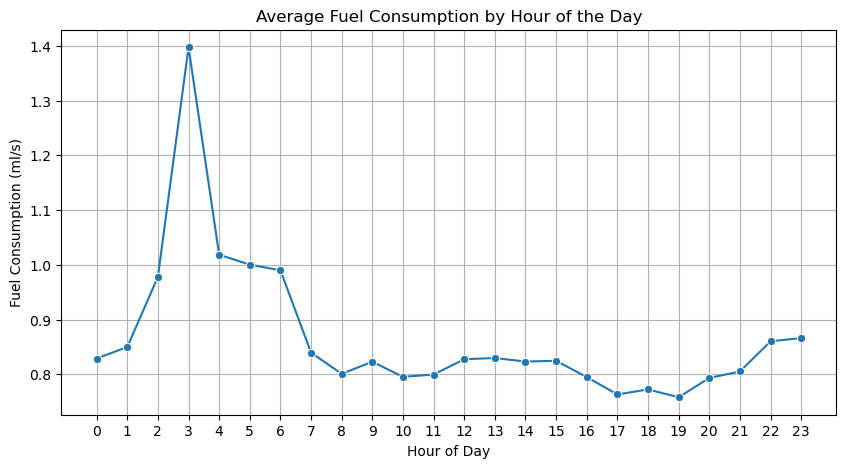

In [91]:
# Average fuel consumption by hour of the day

df['Hour'] = df['Timestamp'].dt.hour

hourly_avg = df.groupby('Hour')['Fuel_Consumption (ml/s)'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10,5))
sns.lineplot(x='Hour', y='Fuel_Consumption (ml/s)', data=hourly_avg, marker='o')
plt.title("Average Fuel Consumption by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fuel Consumption (ml/s)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


Interesting to see the huge spike at 3am and a general higher consumption from 1am to 7am compared to the rest of the day. Let's see why that might be the case. 

My intuition says its because the traffic is less dense so no traffic jams and people can also drive more "dangerously" during the night so it increases their fuel consumption. 

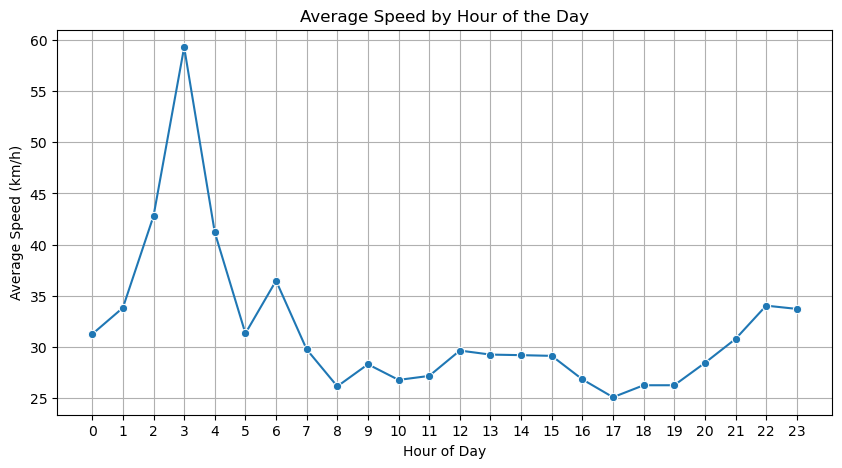

In [92]:
# Average speed by hour of the day

df['Hour'] = df['Timestamp'].dt.hour

# Calcul de la vitesse moyenne par heure
hourly_speed = df.groupby('Hour')['Speed (km/h)'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10,5))
sns.lineplot(x='Hour', y='Speed (km/h)', data=hourly_speed, marker='o')
plt.title("Average Speed by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Speed (km/h)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


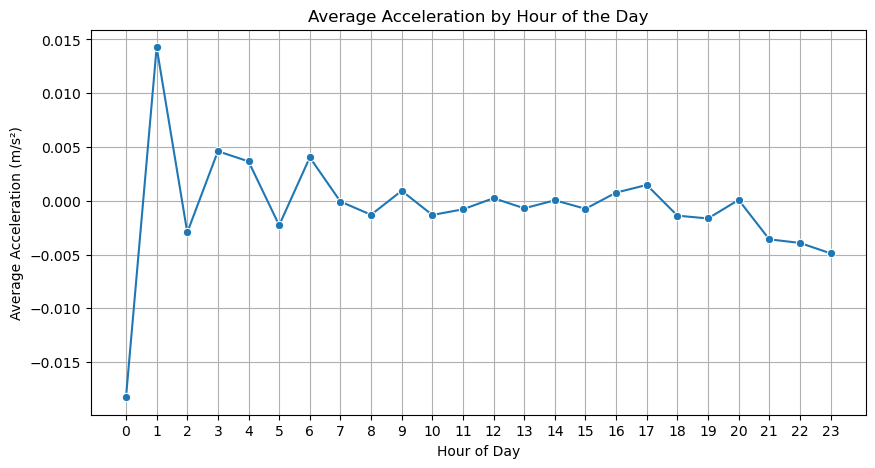

In [93]:
# Average acceleration by hour of the day

df['Hour'] = df['Timestamp'].dt.hour

# Calcul de l'accélération moyenne par heure
hourly_acc = df.groupby('Hour')['Acceleration (m/s²)'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10,5))
sns.lineplot(x='Hour', y='Acceleration (m/s²)', data=hourly_acc, marker='o')
plt.title("Average Acceleration by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Acceleration (m/s²)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


Combining the positive correlation (0.47 and 0.44 respectively) between speed/consumption and acceleration/consumption, and the two graphs above, we can clearly see that my intuition was right. 1am sees a big spike in average acceleration while 3am sees a huge spike in average speed.

This really shows that on average, people drive at higher speeds and accelerate more at night when the traffic is less dense, which results in higher fuel_consumption. 

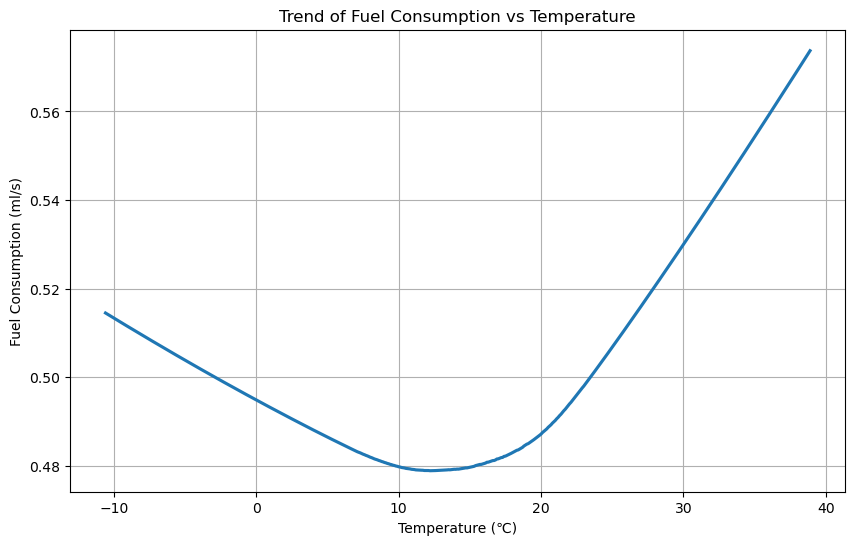

In [94]:
# Visualiation of the relationship between fuel consumption and temperature
plt.figure(figsize=(10,6))
sns.regplot(
    x='Temperature (℃)',
    y='Fuel_Consumption (ml/s)',
    data=df,
    scatter=False,  
    lowess=True     
)
plt.xlabel("Temperature (℃)")
plt.ylabel("Fuel Consumption (ml/s)")
plt.title("Average Fuel Consumption by Temperature")
plt.grid(True)
plt.show()


I used scatter=False to not show the different points of the dataset and help a clear trendline appear. 

Fuel consumption is high not only at high temperatures but more specifically at "extreme" temperatures, low or high. 
When it's very cold, the car consumes more. When it's very hot, the car consumes more too. It's not about the warmth, it's about the extremeness of the temperature. 

# 2. Model training and feature engineering
In this second step, we will train a few models to predict the fuel consumption of a car based on the weather and engine sensor data. 

In [95]:
# First we define the features and the target

features = [
    'Pressure (kPa)',
    'Temperature (℃)',
    'Relative_Humidity (%)',
    'Heat_Index (℃)',
    'Speed (km/h)',
    'Acceleration (m/s²)',
    'Vehicle_Specific_Power (kW/ton)'
]

target = 'Fuel_Consumption (ml/s)'


In [96]:
# We create a smaller dataset to train the models faster (30% of the original dataset)
df_small = df.sample(frac=0.30, random_state=42)

In [97]:
# We split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

X = df_small[features]
y = df_small[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [98]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [100]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [101]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate(model):
    preds = model.predict(X_test)
    print("R²:", r2_score(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("MAE:", mean_absolute_error(y_test, preds))

print("Linear Regression")
evaluate(lr)

print("\nGradient Boosting")
evaluate(gbr)

print("\nXGBoost")
evaluate(xgb)


Linear Regression
R²: 0.4888312192615625
RMSE: 0.6226835585874043
MAE: 0.41584536313038256

Gradient Boosting
R²: 0.587852980095843
RMSE: 0.5591281009639069
MAE: 0.3496183874105406

XGBoost
R²: 0.5800822444925948
RMSE: 0.5643744664101685
MAE: 0.34938816072416556


These first results aren't that good. Linear regression doesn't even explain half the variance, which makes sense because the fuel consumption isn't linear with speed, acceleration etc.). 

Let's try some feature engineering and some other models to get a better R2.

In [102]:
# Add new columns for hour, day of week and weekend
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

In [103]:
# Short-term rolling means
df['Speed_roll3'] = df['Speed (km/h)'].rolling(3).mean().fillna(method='bfill')
df['Acceleration_roll3'] = df['Acceleration (m/s²)'].rolling(3).mean().fillna(method='bfill')
df['Vehicle_Specific_Power_roll3'] = df['Vehicle_Specific_Power (kW/ton)'].rolling(3).mean().fillna(method='bfill')

# Lagged fuel consumption
df['Fuel_Consumption_lag1'] = df['Fuel_Consumption (ml/s)'].shift(1).fillna(method='bfill')
df['Fuel_Consumption_lag3'] = df['Fuel_Consumption (ml/s)'].shift(3).fillna(method='bfill')


/var/folders/pb/vtvpdsq9619bm13tft7gdtp40000gn/T/ipykernel_71898/2895971116.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Speed_roll3'] = df['Speed (km/h)'].rolling(3).mean().fillna(method='bfill')
/var/folders/pb/vtvpdsq9619bm13tft7gdtp40000gn/T/ipykernel_71898/2895971116.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Acceleration_roll3'] = df['Acceleration (m/s²)'].rolling(3).mean().fillna(method='bfill')
/var/folders/pb/vtvpdsq9619bm13tft7gdtp40000gn/T/ipykernel_71898/2895971116.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Vehicle_Specific_Power_roll3'] = df['Vehicle_Specific_Power (kW/ton)'].rolling(3).mean().fillna(method='bfill')
/var/folders/pb/vtvpdsq9619bm13tft7gdtp40000gn/T/ipykernel_

In [104]:
df['Speed_x_ACC'] = df['Speed (km/h)'] * df['Acceleration (m/s²)']
df['Speed_x_VSP'] = df['Speed (km/h)'] * df['Vehicle_Specific_Power (kW/ton)']
df['Acceleration_x_Temperature'] = df['Acceleration (m/s²)'] * df['Temperature (℃)']


In [105]:
# First we define the features and the target

featureEngineered = [
    'Pressure (kPa)',
    'Temperature (℃)',
    'Relative_Humidity (%)',
    'Heat_Index (℃)',
    'Speed (km/h)',
    'Acceleration (m/s²)',
    'Vehicle_Specific_Power (kW/ton)',
    'Hour',
    'DayOfWeek',
    'Speed_roll3',
    'Acceleration_roll3',
    'Vehicle_Specific_Power_roll3',
    'Fuel_Consumption_lag1',
    'Fuel_Consumption_lag3',
    'Speed_x_ACC',
    'Speed_x_VSP',
    'Acceleration_x_Temperature'
]

target = 'Fuel_Consumption (ml/s)'

In [106]:
# We split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

X = df[featureEngineered]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [107]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=12,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [108]:

import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.02,
    num_leaves=150,
    max_depth=12,
    subsample=0.8,
    colsample_bytree=0.8
)

lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3502
[LightGBM] [Info] Number of data points in the train set: 1025626, number of used features: 17
[LightGBM] [Info] Start training from score 0.811475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    loss_function='RMSE',
    verbose=0,
    allow_writing_files=False
)

cat_model.fit(X_train, y_train)



# 3. Evaluation of our models

In [110]:
# Let's compare our models

def compare_trained_models(models_dict):
    """
    models_dict: dict of {'model_name': trained_model_object}
    Uses your existing evaluate() function to print metrics.
    """
    for name, model in models_dict.items():
        print(f"--- {name} ---")
        evaluate(model)
        print()


In [111]:
models = {
    "XGBoost": xgb,
    "LightGBM": lgb_model,
    "CatBoost": cat_model
}

compare_trained_models(models)


--- XGBoost ---
R²: 0.58290107390573
RMSE: 0.5687028255513263
MAE: 0.34960655914493455

--- LightGBM ---
R²: 0.5929947515067162
RMSE: 0.5617794583146198
MAE: 0.3479619241162692

--- CatBoost ---
R²: 0.5919274837254767
RMSE: 0.5625155379823247
MAE: 0.3476238743184257



Overall the best model we found is LightGBM, it has the highest R2 of the three and lowest RMSE. 
Catboost has lower MAE but worse R2 and RMSE so it came to a close second. 

These results aren't great, our best model only explains ~59.3% of the variance but it actually is good enough for our use case.
Here's why : 
- We only have 9 raw features, fuel consumption depends on many more factors that aren't in our dataset. With our limited information, getting 0.59% variance is actually quite good. 
- Our MAE of ~0.348 shows that our model is quite precise. On average, predictions are off by 0.35 ml/s. This is precise enough for the practical use we stated at the beginning of this notebook (predict fuel consumption to reduce it, plan trips more efficiently, and understand how driving behavior impacts fuel efficiency. )

Realistically, with this performance, we can reliably rank different driving conditions and behaviours by the expected fuel consumption.
We actually tried to engineer more features and tweak the model's parameters but it just ended up making more noise and reducing our model's performance. This is the optimal pipeline we found for our dataset. 

In [112]:
def plot_lgb_feature_importance_pct(model, X_train, top_n=20):
    """
    Plots the top_n features of a LightGBM model by percentage importance.
    """
    # Compute percentage importance
    importance = model.feature_importances_
    features = X_train.columns
    fi_df = pd.DataFrame({'Feature': features, 'Importance': importance})
    fi_df['Importance_pct'] = 100 * fi_df['Importance'] / fi_df['Importance'].sum()
    
    # Sort and select top_n
    fi_df = fi_df.sort_values(by='Importance_pct', ascending=True).tail(top_n)
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.barh(fi_df['Feature'], fi_df['Importance_pct'], color='skyblue')
    plt.xlabel('Importance (%)')
    plt.title('Top Feature Importances (%) - LightGBM')
    plt.show()
    
    return fi_df


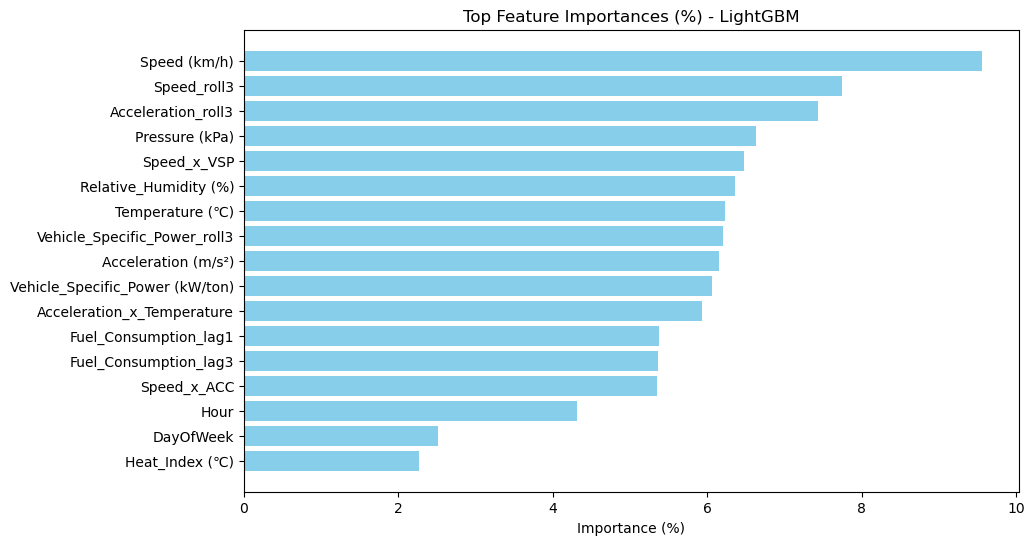

In [113]:
fi_df_pct = plot_lgb_feature_importance_pct(lgb_model, X_train, top_n=20)

# 4. Saving our best model 

In [114]:
lgb_model.booster_.save_model('lgb_model.txt')

# Load
loaded_lgb = lgb.Booster(model_file='lgb_model.txt')
